## Broadcasting

* The term broadcasting describes how NumPy treats arrays with different shapes during `arithmetic operations`.
* Subject to certain constraints, the `smaller array` is `broadcast` across the `larger array` so that they have compatible shapes.
* Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.
* It does this without making needless copies of data and usually leads to efficient algorithm implementations.
* There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

In [1]:
import numpy as np

In [2]:
ar = np.array([10,20,30,40])
br = np.array([2.5,3.5])

In [3]:
ar+br

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])

In [ ]:
a * b

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

![](https://numpy.org/doc/stable/_images/broadcasting_1.png)


* In the simplest example of broadcasting, the scalar b is stretched to become an array of same shape as a so the shapes are compatible for element-by-element multiplication.

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*ITqlNNfTIvjIuscJPdsXZw.png)

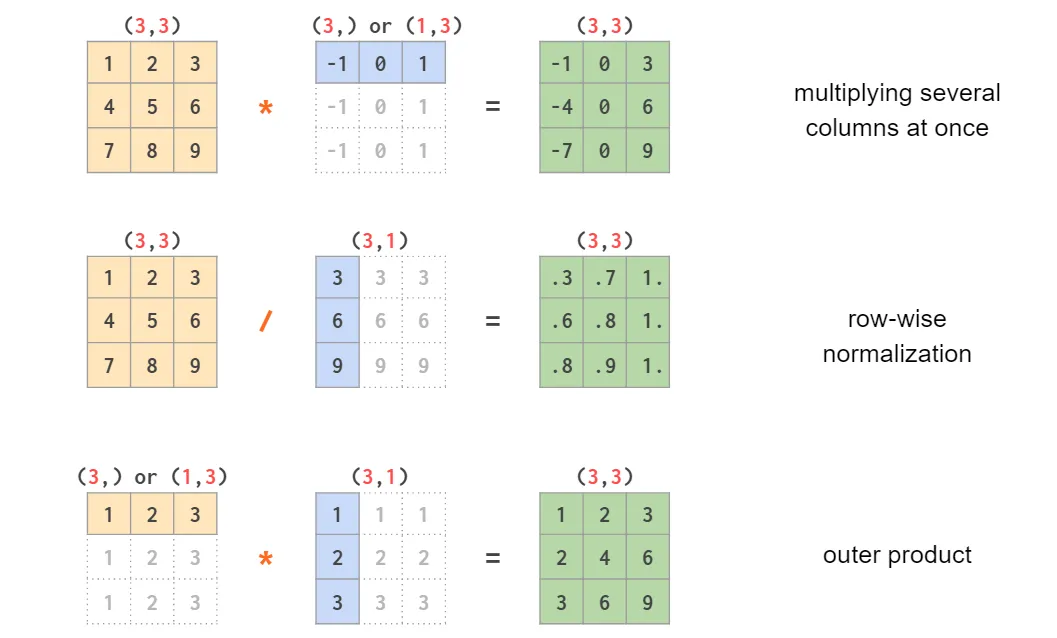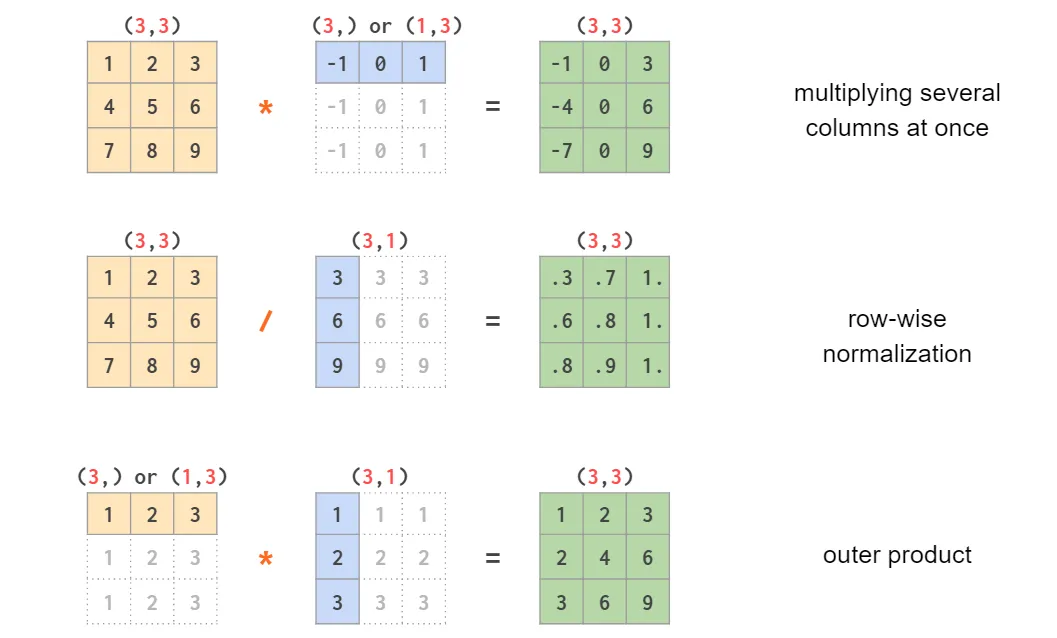

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*h8hFhsht_xbQihRV8fzKAg.png)

## General Broadcasting Rules
* When operating on two arrays, NumPy compares their shapes element-wise.
* It starts with the trailing (i.e. rightmost) dimension and works its way left.
* Two dimensions are compatible when
* 1. they are equal, or not
  2. one of them is 1.
     

* if these conditions are not met, a `ValueError: operands could not be broadcast together exception` is thrown, indicating that the arrays have incompatible shapes.`

#### Broadcastable arrays


* A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

1. A      `(4d array)`: 8 x 1 x 6 x 1
2. B      `(3d array)`:     7 x 1 x 5
----------------------------------
Result    `(4d array)`: 8 x 7 x 6 x 5

In [4]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
a.shape

(4, 3)

In [6]:
b = np.array([1.0, 2.0, 3.0])
b.shape

(3,)

1. A    2D Array (4,3)
2. B    1D Array (1,3)

In [8]:
c = a + b
c.shape

(4, 3)

In [9]:
d = np.array([1.0, 2.0, 3.0, 4.0])
d

array([1., 2., 3., 4.])

In [10]:
d.shape

(4,)

In [11]:
a + d

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

1. C   2D Array (4,3)
2. D   1D Array (1,4)

![](https://numpy.org/doc/stable/_images/broadcasting_2.png)

* A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns.

![](https://numpy.org/doc/stable/_images/broadcasting_3.png)

* When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

* Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [12]:
a = np.array([0.0, 10.0, 20.0, 30.0])
a.shape

(4,)

In [13]:
a.ndim

1

In [14]:
b = np.array([1.0, 2.0, 3.0])
b.shape

(3,)

In [15]:
b.ndim

1

![](https://numpy.org/doc/stable/_images/broadcasting_4.png)

* In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.
* Here the newaxis index operator inserts a new axis into a, making it a two-dimensional `4x1` array. Combining the 4x1 array with b, which has shape (3,), yields a 4x3 array

In [16]:
a  +  b 

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [17]:
a[:,np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

1. `Rule 1:` If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its `leading (left) side`.

2. `Rule 2:` If the shape of the two arrays does not match in any dimension, the array with `shape equal to 1` in that dimension is `stretched` to match the other shape.

3. `Rule 3:` If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [19]:
a = np.arange(12).reshape(4, 3)
means_columns = a.mean(axis=0)
res = a - means_columns
print('original array', a, sep='\n')
print('.. column means', a.mean(axis=0), sep='\n')
print('demeaned array', res, sep='\n')
print('.. column means', res.mean(axis=0), sep='\n')

original array
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
.. column means
[4.5 5.5 6.5]
demeaned array
[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]
.. column means
[0. 0. 0.]
